In [36]:
import numpy as np
from math import sqrt, pi
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#calculate distance between 2 object of x,y coordinates
def dist(a,b):
    return sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [109]:
#parameters
number_of_nodes = 100
delta = 2.

theta = 2*pi/number_of_nodes
angles = np.arange(0, 2*pi, theta)

#coordinates of each node
positions = np.array([np.cos(angles), np.sin(angles)]).T

In [110]:
#create graph
graph = nx.Graph()
graph.add_nodes_from(range(number_of_nodes))

#calculate list of distances: for each node get the distance from every other
#dist_matrix = np.zeros((number_of_nodes, number_of_nodes))

norm = dist(positions[0], positions[1])

#create links between adjacent nodes
for i in range(number_of_nodes-1):
    graph.add_edge(i, i+1)
graph.add_edge(number_of_nodes-1, 0)

#create N random links
createdNodes = 0
while createdNodes < number_of_nodes:
    rand1 = np.random.randint(0,100)
    rand2 = np.random.randint(0,100)
    if (rand1 == rand2):
        continue

    distance = dist(positions[rand1], positions[rand2])
    
    if np.random.rand() < (distance/norm)**(-delta):
        graph.add_edge(rand1,rand2)
        createdNodes += 1


    # for j in range(i, number_of_nodes):
    #     dist_matrix[i,j] = dist(positions[i], positions[j])
    #     dist_matrix[j,i] = dist_matrix[i,j]
        
    #     #create link between nodes
    #     # max probability when node are adjacent. The distance between adjacent node is sqrt(2-2cos(360/n))
    #     # so the maximum (required for normalize the probability) is (sqrt(2-2cos(360/n)))**(-delta)
    #     if i != j:
    #         if np.random.rand() < (dist_matrix[i,j]/norm)**(-delta):
    #             #print(dist_matrix[i,j]**(-delta))
    #             graph.add_edge(i,j)

createdNodes

100

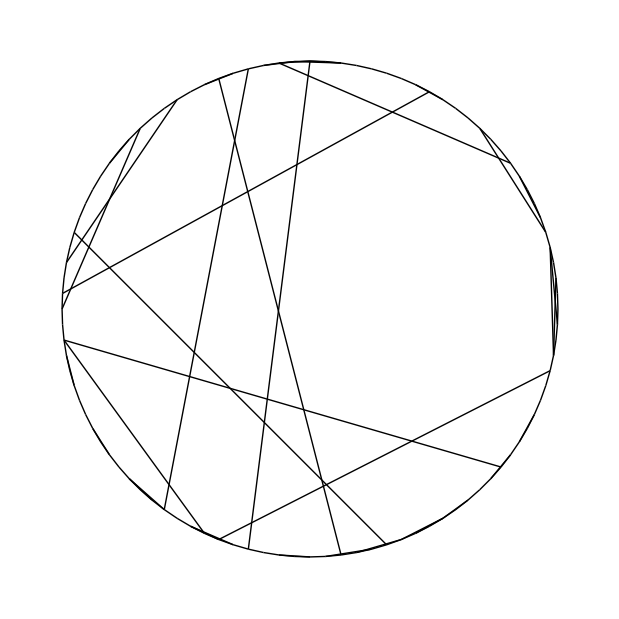

In [111]:
plt.figure(figsize=(6,6))   #to be sure that the image is a square and not stretched
nx.draw_circular(graph, with_labels=False, node_size=0)
plt.show()

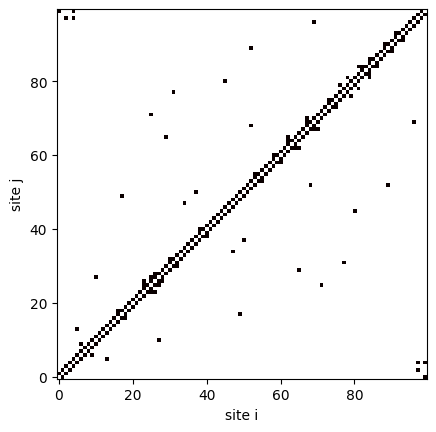

In [112]:
adj_matrix = nx.adjacency_matrix(graph).toarray()

# Plot the adjacency matrix as a heatmap
plt.imshow(adj_matrix, cmap='hot_r')

plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.show()